In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from color_util import *
from color_cluster import* 
from color_pop_util import *
from colour import hsl2rgb

dat=pd.read_csv("project_pop_color_hsl_200.csv")
dat.drop(columns=["Unnamed: 0","Unnamed: 0.1"],inplace=True)
dat.fillna(value=0,inplace=True)
dat_rowmax=dat.copy()
rowmax=dat.drop(columns=['time','project_id']).idxmax(axis=1) 


In [3]:
dat.sort_values('time').tail()

,project_id,time,0,1,2,3,4,5,6,7,...,140,141,142,143,144,145,146,147,148,149
26059,26119901,2020/06/09,0.0,0.0,0.0,0.0,40.0,0.0,38.0,83.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9357,26121094,2020/06/09,87.0,777.0,469.0,57.0,0.0,2.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20269,26127785,2020/06/10,5.0,24.0,27.0,1.0,0.0,40.0,97.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7376,26126078,2020/06/10,39.0,250.0,67.0,306.0,526.0,67.0,180.0,88.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8313,26126339,2020/06/10,0.0,0.0,48.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [193]:
hsl_cat=np.zeros((6,5,5))
hue=[[330,30],[30,90],[90,150],[150,210],[210,270],[270,330]]
satuation=[[0,20],[20,40],[40,60],[60,80],[80,100]]
lightness=[[0,20],[20,40],[40,60],[60,80],[80,100]]

hue_value=[0,60,120,180,240,300]
satuation_value=[10,30,50,70,90]
lightness_value=[10,30,50,70,90]

In [194]:
start=pd.to_datetime('2010/12')
end=pd.to_datetime('2020/06')
x=dat[pd.to_datetime(dat['time'])>start].copy()
x=x[pd.to_datetime(x['time'])<end]

In [195]:
x=x.sort_values('time')
x_day=x.groupby('time').sum()
x_day.drop(columns=["project_id"],inplace=True)
x_day.reset_index(inplace=True)
#x=x.fillna(value=0)

In [196]:
x_week=x_day.copy()
x_week['time']=pd.to_datetime(x_week['time']) - pd.to_timedelta(7, unit='d')
x_week = x_week.groupby(pd.Grouper(key='time', freq='W-MON')).sum().reset_index().sort_values('time')
x_week.tail()
x_week['tot']=x_week.iloc[:, 1:].sum(axis=1)

,time,0,1,2,3,4,5,6,7,8,...,140,141,142,143,144,145,146,147,148,149
491,2020-04-27,9627.0,70868.0,44872.0,23448.0,4170.0,11491.0,49120.0,36337.0,21403.0,...,1021.0,9.0,0.0,2.0,22.0,109.0,0.0,0.0,0.0,4.0
492,2020-05-04,976.0,14447.0,29223.0,16046.0,3491.0,5908.0,30500.0,45004.0,13819.0,...,15.0,625.0,109.0,3467.0,638.0,7.0,26.0,0.0,91.0,221.0
493,2020-05-11,880.0,21152.0,56171.0,32422.0,3204.0,5340.0,35367.0,21704.0,15732.0,...,3.0,29.0,29.0,3.0,6.0,1.0,7.0,3.0,0.0,1.0
494,2020-05-18,2672.0,37261.0,45995.0,23945.0,4786.0,4204.0,24275.0,32827.0,19243.0,...,346.0,2032.0,4.0,222.0,284.0,66.0,18.0,0.0,52.0,113.0
495,2020-05-25,969.0,12500.0,26838.0,17816.0,7925.0,1939.0,18880.0,35918.0,21181.0,...,109.0,3214.0,1500.0,299.0,15.0,282.0,1266.0,0.0,43.0,1.0


In [198]:
color_sort=(x_week.sum(axis=0).sort_values()[::-1])[1:]
#color_sort

In [199]:
def hsl_category_to_rgb():
    color_rgb=[]
    for i in range(150):
        i1,i2,i3=oneD_to_3D_index(i)
        color_hsl=np.asarray([hue_value[i1]/360.,satuation_value[i2]/100.,lightness_value[i3]/100.])
        color_rgb_i=np.asarray(hsl2rgb(color_hsl))
        color_rgb.append(color_rgb_i)
        
    return color_rgb
color_rgb=hsl_category_to_rgb()

In [200]:
# monthly

x_month=x_week.copy()
x_month=x_month.groupby(pd.Grouper(key='time',freq='M')).sum().reset_index().sort_values('time')



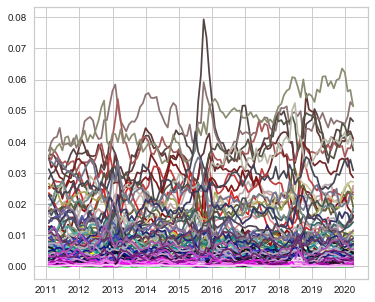

In [350]:
fig, ax = plt.subplots(figsize=(6,5))
#x_rolling=x_week.copy()

ax.plot(pd.to_datetime(x_month['time']),x_month['0'].rolling(4,center=True).mean()/x_month['tot'].rolling(4,center=True).mean(),color=color_rgb[0])#c=colorcode['hexcode'][c])
for c in range(1,150):
    ax.plot(pd.to_datetime(x_month['time']),x_month[str(c)].rolling(4,center=True).mean()/x_month['tot'].rolling(4,center=True).mean(),color=color_rgb[c])

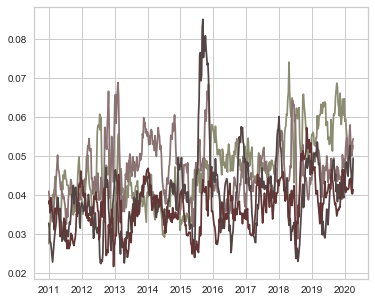

In [351]:
fig, ax = plt.subplots(figsize=(6,5))
#x_rolling=x_week.copy()
x_plot=x_week.copy()
ax.plot(pd.to_datetime(x_plot['time']),x_plot[color_sort.keys()[0]].rolling(8,center=True).mean()/x_plot['tot'].rolling(8,center=True).mean(),color=color_rgb[int(color_sort.keys()[0])])#c=colorcode['hexcode'][c])
for i in range(1,4):
    ax.plot(pd.to_datetime(x_plot['time']),x_plot[color_sort.keys()[i]].rolling(8,center=True).mean()/x_plot['tot'].rolling(8,center=True).mean(),color=color_rgb[int(color_sort.keys()[i])])

In [71]:
#x_day
## project to 3 axis:

def marginal_index(axis=0,cat=0):
    hsl_cat=np.arange(150).reshape((6,5,5))
    if axis==0:
        index=hsl_cat[cat,:,:]
    if axis==1:
        index=hsl_cat[:,cat,:]
    if axis==2:
        index=hsl_cat[:,:,cat]
    return index.flatten()
marginal_i=marginal_index(axis=1,cat=2)
marginal_i

def marginal2D_index(s=0,l=0):
    hsl_cat=np.arange(150).reshape((6,5,5))

    index=hsl_cat[:,s,l]
 
    return index.flatten()

# 
def marginal_cat(df,axis=0,cat=0):
    marginal_i=marginal_index(axis=axis,cat=cat)
    i_str=[str(i) for i in marginal_i]
    
    return df[i_str].sum(axis=1)

def marginal2D_cat(df,s=0,l=0):
    marginal_i=marginal2D_index(s=s,l=l)
    i_str=[str(i) for i in marginal_i]
    
    return df[i_str].sum(axis=1)


In [63]:
columns=['time']
columns.extend(['h'+str(i) for i in range(6)])
columns.extend(['s'+str(i) for i in range(5)])
columns.extend(['l'+str(i) for i in range(5)])
columns.append('tot')
dat_marginal=pd.DataFrame(columns=columns)
dat_marginal['time']=x_week['time']
dat_marginal['tot']=x_week['tot']
#for idex,row in x_week.iterrows():
#    element={}
#    element['time']=row['time']
    
for i in range(5):
    dat_marginal['h'+str(i)]=marginal_cat(x_week,axis=0,cat=i)
    dat_marginal['s'+str(i)]=marginal_cat(x_week,axis=1,cat=i)
    dat_marginal['l'+str(i)]=marginal_cat(x_week,axis=1,cat=i)
dat_marginal['h5']=marginal_cat(x_week,axis=0,cat=5)
    
   

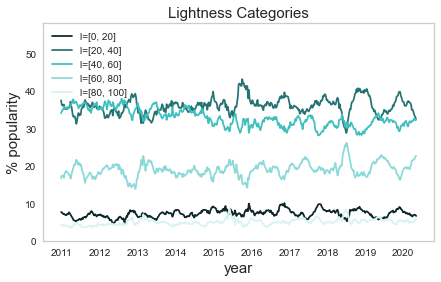

In [245]:
fig, ax = plt.subplots(figsize=(7,4))
for i in range(5):
    ax.plot(x_week['time'],
        100*marginal_cat(x_week,axis=2,cat=i)
        .rolling(8,center=True).mean()/x_week['tot']
        .rolling(8,center=True).mean(),
       color=hsl2rgb([0.5,0.5,lightness_value[i]/100.]),
           label='l='+str(lightness[i]))
ax.legend(loc='upper left')
ax.set_ylim([0,58])
ax.set_xlabel("year",fontsize=15)
ax.set_ylabel('% popularity',fontsize=15)
ax.set_title("Lightness Categories",fontsize=15)
ax.grid(False)
plt.savefig('lightness_cat.png', dpi=300)

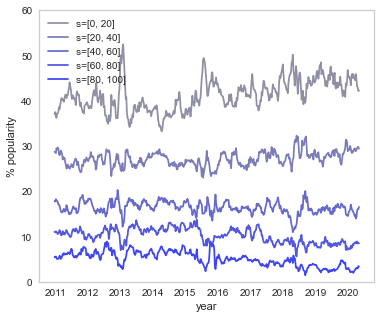

In [23]:
fig, ax = plt.subplots(figsize=(6,5))
for i in range(5):
    ax.plot(x_week['time'],
        100*marginal_cat(x_week,axis=1,cat=i)
        .rolling(8,center=True).mean()/x_week['tot']
        .rolling(8,center=True).mean(),
       color=hsl2rgb([0.66,lightness_value[i]/100.,0.6]),
            label='s='+str(satuation[i]))
ax.legend()
ax.set_ylim([0,60])
ax.set_xlabel("year")
ax.set_ylabel('% popularity')
ax.set_label('% popularity')
ax.grid(False)

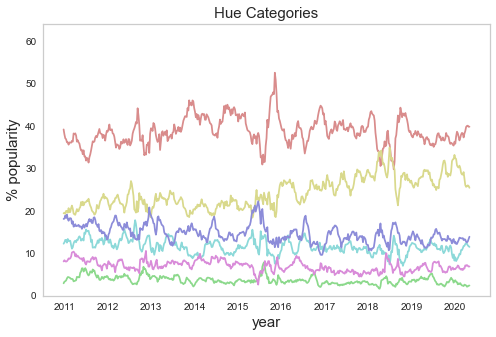

In [246]:
fig, ax = plt.subplots(figsize=(8,5))
for i in range(6):
    ax.plot(x_week['time'],
        100*marginal_cat(x_week,axis=0,cat=i)
        .rolling(8,center=True).mean()/x_week['tot']
        .rolling(8,center=True).mean(),
       color=hsl2rgb([hue_value[i]/360.,0.5,0.7]))
ax.set_ylim([0,64])
ax.set_title("Hue Categories",fontsize=15)
ax.set_xlabel("year",fontsize=15)
ax.set_ylabel('% popularity',fontsize=15)
ax.grid(False)
plt.savefig('hue_cat.png', dpi=300)

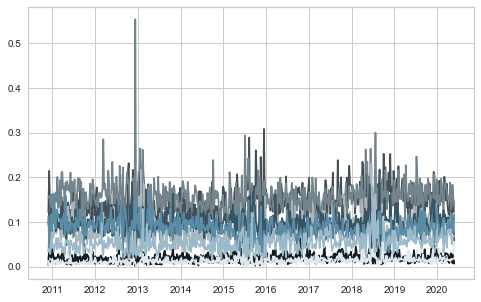

In [93]:
columns=(['s'+str(i)+'l'+str(j) for i in range(5) for j in range(5)])


fig, ax = plt.subplots(figsize=(8,5))

for i in columns[:10]:
    ax.plot(dat_marginal2D['time'],dat_marginal2D[i]/dat_marginal2D['tot'],
            color=hsl2rgb([200/360.,satuation_value[int(i[1])]/100.
                           ,lightness_value[int(i[3])]/100]))


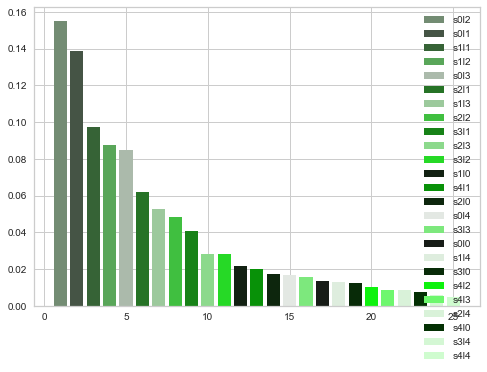

In [133]:
color_sort_2D=(dat_marginal2D.sum(axis=0).sort_values()[::-1])[1:]
for i in range(25):
    s=int(color_sort_2D.keys()[i][1])
    l=int(color_sort_2D.keys()[i][3])
    label=color_sort_2D.keys()[i]
    plt.bar([i+1],[color_sort_2D[i]/color_sort_2D.sum()],
            color=hsl2rgb([120/360.,satuation_value[s]/100.
                           ,lightness_value[l]/100]),label=label)
plt.legend()

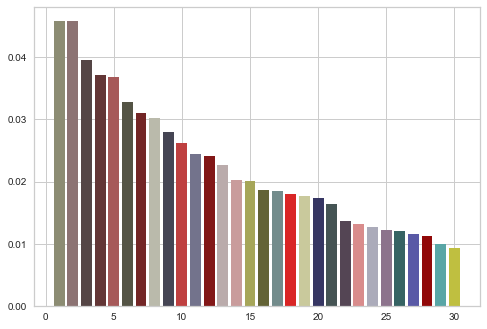

In [26]:
for i in range(30):
    plt.bar([i+1],[color_sort[i]/color_sort.sum()],color=color_rgb[int(color_sort.keys()[i])])
#color_sort.keys()

In [30]:
dat_marginal_month=dat_marginal.groupby(pd.Grouper(key='time',freq='M')).sum().reset_index().sort_values('time')
dat_marginal_month.head()

,time,h0,h1,h2,h3,h4,h5,s0,s1,s2,s3,s4,l0,l1,l2,l3,l4,tot
0,2010-11-30,274261.0,82465.0,11318.0,81405.0,108208.0,19591.0,182657.0,152394.0,112856.0,83424.0,45917.0,182657.0,152394.0,112856.0,83424.0,45917.0,577248.0
1,2010-12-31,1320842.0,711754.0,81417.0,358904.0,708421.0,275223.0,1354771.0,919755.0,588283.0,391598.0,202154.0,1354771.0,919755.0,588283.0,391598.0,202154.0,3456561.0
2,2011-01-31,1775625.0,926829.0,199559.0,726455.0,890052.0,406352.0,1785897.0,1438949.0,901175.0,541425.0,257426.0,1785897.0,1438949.0,901175.0,541425.0,257426.0,4924872.0
3,2011-02-28,1436516.0,877117.0,185389.0,456796.0,691503.0,404594.0,1599355.0,1205292.0,623463.0,420131.0,203674.0,1599355.0,1205292.0,623463.0,420131.0,203674.0,4051915.0
4,2011-03-31,1244214.0,682934.0,107682.0,358595.0,555070.0,344487.0,1327320.0,922257.0,525290.0,350230.0,167885.0,1327320.0,922257.0,525290.0,350230.0,167885.0,3292982.0


In [76]:
columns=['time']
columns.extend(['s'+str(i)+'l'+str(j) for i in range(5) for j in range(5)])

columns.append('tot')
dat_marginal2D=pd.DataFrame(columns=columns)
dat_marginal2D['time']=x_week['time']
dat_marginal2D['tot']=x_week['tot']
#for idex,row in x_week.iterrows():
#    element={}
#    element['time']=row['time']
    
for i in range(5):
    for j in range(5):
        dat_marginal2D['s'+str(i)+'l'+str(j)]=marginal2D_cat(x_week,s=i,l=j)
 

dat_marginal2D_month=dat_marginal2D.groupby(pd.Grouper(key='time',freq='M')).sum().reset_index().sort_values('time')
dat_marginal_month.head()

,time,h0,h1,h2,h3,h4,h5,s0,s1,s2,s3,s4,l0,l1,l2,l3,l4,tot
0,2010-11-30,274261.0,82465.0,11318.0,81405.0,108208.0,19591.0,182657.0,152394.0,112856.0,83424.0,45917.0,182657.0,152394.0,112856.0,83424.0,45917.0,577248.0
1,2010-12-31,1320842.0,711754.0,81417.0,358904.0,708421.0,275223.0,1354771.0,919755.0,588283.0,391598.0,202154.0,1354771.0,919755.0,588283.0,391598.0,202154.0,3456561.0
2,2011-01-31,1775625.0,926829.0,199559.0,726455.0,890052.0,406352.0,1785897.0,1438949.0,901175.0,541425.0,257426.0,1785897.0,1438949.0,901175.0,541425.0,257426.0,4924872.0
3,2011-02-28,1436516.0,877117.0,185389.0,456796.0,691503.0,404594.0,1599355.0,1205292.0,623463.0,420131.0,203674.0,1599355.0,1205292.0,623463.0,420131.0,203674.0,4051915.0
4,2011-03-31,1244214.0,682934.0,107682.0,358595.0,555070.0,344487.0,1327320.0,922257.0,525290.0,350230.0,167885.0,1327320.0,922257.0,525290.0,350230.0,167885.0,3292982.0


In [78]:
dat_marginal2D_month.tail()

,time,s0l0,s0l1,s0l2,s0l3,s0l4,s1l0,s1l1,s1l2,s1l3,...,s3l1,s3l2,s3l3,s3l4,s4l0,s4l1,s4l2,s4l3,s4l4,tot
110,2020-01-31,48081.0,459936.0,447179.0,278072.0,87145.0,59998.0,299569.0,244004.0,189373.0,...,105399.0,60404.0,36777.0,11447.0,14948.0,42927.0,16252.0,9931.0,6248.0,2980595.0
111,2020-02-29,47488.0,504104.0,537987.0,262958.0,51085.0,76342.0,349669.0,311493.0,206191.0,...,102806.0,42528.0,39590.0,16926.0,15826.0,17844.0,2038.0,8791.0,6992.0,3297690.0
112,2020-03-31,67384.0,736127.0,753550.0,443178.0,76209.0,112373.0,469805.0,313171.0,270640.0,...,143817.0,125158.0,53033.0,22310.0,17524.0,49596.0,11448.0,23455.0,13848.0,4366509.0
113,2020-04-30,59212.0,610677.0,649395.0,393395.0,84699.0,92079.0,381708.0,381348.0,326308.0,...,137574.0,85916.0,52116.0,24602.0,26720.0,50272.0,27123.0,18809.0,14495.0,4144516.0
114,2020-05-31,30229.0,310324.0,422656.0,286295.0,85924.0,52644.0,249907.0,276981.0,172654.0,...,97240.0,39179.0,64466.0,15527.0,20580.0,35613.0,15465.0,14705.0,9962.0,2801118.0


In [80]:
print(dat_marginal2D.shape)
dat_marginal2D.to_csv("pop_color_hsl_marginal2D_weekly.csv")
print(dat_marginal2D.shape)
dat_marginal2D_month.to_csv("pop_color_hsl_marginal2D_monthly.csv")

(496, 27)
(496, 27)
